# K-means from scratch & with scikit learn
My goal in this notebook is in the firtly to code from scratch the kmeans algorithm to understand this model and secondly to use scikit learn library 

### 1-From scratch

In [51]:
import numpy as np
import matplotlib.pyplot as plt
def distance(x1,y1,x2,y2):
    return np.sqrt(np.square(x1-x2)+np.square(y1-y2))
#This function is used to compare two lists

def identiqueList(X,Y):
    if (len(X)!=len(Y) or len(X)==0 or len(Y)==0):
        return False
    identique=0
    for i in range(len(X)):
        if X[i]==Y[i]:
            identique=identique+1
    if identique==len(X):
        return True
    else:
        return False

#Le corps de l'algorithm Kmeans from scratch en dimension 2 . X represente les abscisse, Y les ordonnees,k l'hyperparametre qui definie le nombre de clusters      
def train_kmeans(X,Y,k):
    #initialisation de la liste qui va contenir les centroids 
    centroids=[]
    #initialisation des position de chaque centroid
    for i in range(k):
        #Pour chaque centroide on lui affecte comme abscisse une valeur aleatoire prise entre max de X et min de  X de meme 
        #que pour l'ordonnee
        position={"x":np.random.uniform(min(X),max(X)),"y":np.random.uniform(min(Y),max(Y))}
        centroids.append(position)
        #labels contien a chaque indice (indice representant un point )  le centroids correspondant
        labels=[]
        #pivot_labels est meme que labels : On l'utilise pour arreter l'entrainement .Autrement dit 
        #il stock la valeur de labels a la l'iteration i-1 donc si labels_i-1 =labels_i alors l'entrainement est fini
        pivot_labels=[]
    while(identiqueList(pivot_labels,labels)==False):
        plt.scatter(X,Y,color="red")
        for i in range(len(centroids)):
            plt.scatter(centroids[i]["x"],centroids[i]["y"],s=400)
        plt.show()
        pivot_labels=labels
        labels=[]
        #Dans cette boucle on trouve pour chaque sample le centroide le plus proche
        for i in range(len(X)):
            min_distance=distance(X[i],Y[i],centroids[0]["x"],centroids[0]["y"])
            centroid=0
            for j in range(1,k):
                dist=distance(X[i],Y[i],centroids[j]["x"],centroids[j]["y"])
                if dist<min_distance:
                    centroid=j
                    min_distance=dist
            #on ajoute ce centroide a l'indice du centroide
            labels.append(centroid)
        #Au sorti de cette boucle chaque sample est affecte un centroide .C'est le moment donc d'ajuster la nouvelle 
        #position de chaque centroide en affectant a chaque centroid une abscisse (respectivement ordonnee) egale a la moyenne
        # de tous les abscisses (respectivement ordonnees) de ses samples
        for i in range(k):
            x=0
            y=0
            nbr=0
            for j in range(len(X)):
                if labels[j]==i:
                    x=x+X[j]
                    y=y+Y[j]
                    nbr=nbr+1
            if nbr!=0:
                centroids[i]={"x":x/nbr,"y":y/nbr}
            
    print(labels)
    return (centroids)
#La fonction qui permet de predire la classe d'un sampe 
def predict_class(x,y,centroids):
    label=0
    distance_min=distance(x,y,centroids[0]["x"],centroids[0]["y"])
    for i in range(1,len(centroids)):
        if distance(x,y,centroids[i]["x"],centroids[i]["y"])<distance_min:
            label=i
            min_distance=distance(x,y,centroids[i]["x"],centroids[i]["y"])
    return label
        

        
    

    
                

## Train set

In [52]:

X=[np.random.uniform(4) for _ in range(30)]
Y=[np.random.uniform(2.5,3) for _ in range(30)]
X=X+[np.random.uniform(6.5,7) for _ in range(30,60)]
Y=Y+[np.random.uniform(1.8,2.4) for _ in range(30,60)]
X=X+[np.random.uniform(4,5) for _ in range(60,100)]
Y=Y+[np.random.uniform(1.5,2.) for _ in range(60,100)]

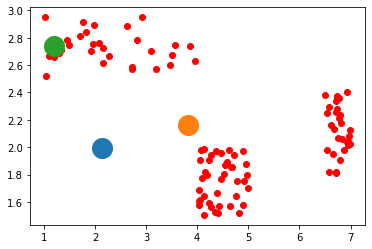

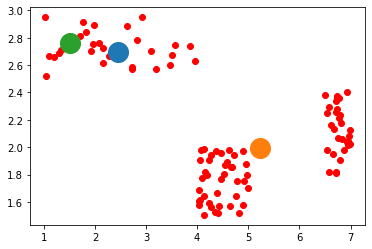

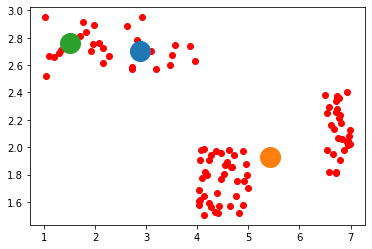

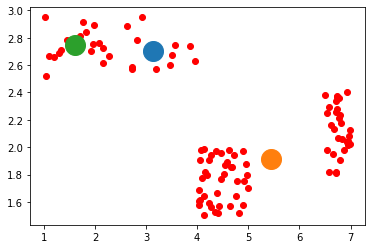

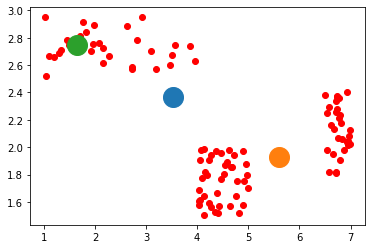

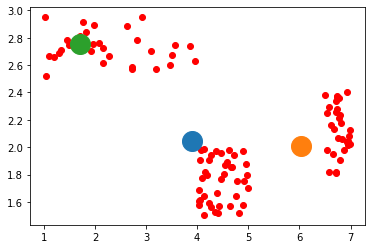

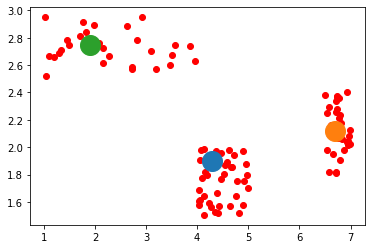

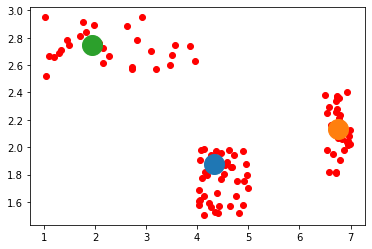

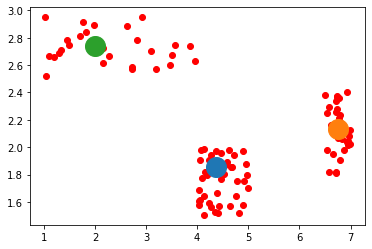

[2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [60]:
centroids=train_kmeans(X,Y,3)

In [6]:
centroids

[{'x': 2.478697286027169, 'y': 2.7852032421302253},
 {'x': 4.457548392594885, 'y': 1.7855739088103155},
 {'x': 6.705056522674536, 'y': 2.1669272216210733}]

In [36]:
centroids[predict_class(4.4,2,centroids)]

{'x': 4.385029620330904, 'y': 1.8957170964575518}

# 2 Now lets use the scikit learn method

lets import the python libraries first

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

In [26]:
data=[]
for i in range(len(X)):
     data.append([X[i],Y[i]])
data=np.array(data)
data[0]

array([2.80590797, 2.63199143])

In [49]:
model=KMeans(n_clusters=3, max_iter=1000, algorithm = 'auto')
model=model.fit(scale(data))
print(model.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [50]:
model.cluster_centers_

array([[-1.2089236 ,  1.3772739 ],
       [ 1.26014888, -0.18883863],
       [-0.03841896, -0.89132646]])

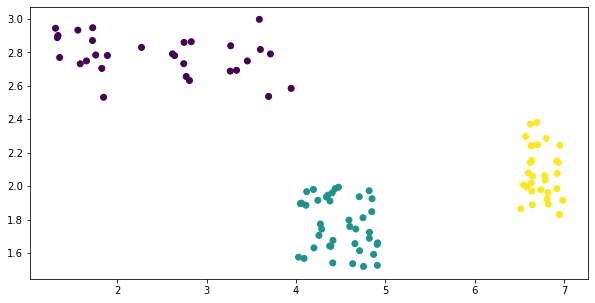

In [40]:
plt.figure(figsize=(10,5))
plt.scatter(data[:,0],data[:,1],c=model.labels_.astype(np.float))
plt.show()

#### Nice scikit learn is powerfull we have our clusters 
Now we can predict an unseen data 

In [42]:
#predict_me = np.array(data[0].astype(float)).reshape(-1,1)
#model.predict([[4.4, 2], [12, 3]])
model.cluster_centers_[model.predict([[4.4, 2]])]

array([[ 1.26014888, -0.18883863]])

# centroids from scratch V centroids Kmeans


In [23]:
print("centers of Kmean {}".format(model.cluster_centers_))
print("center of the model from scratch {}".format(centroids))

centers of Kmean [[-1.2089236   1.3772739 ]
 [-0.03841896 -0.89132646]
 [ 1.26014888 -0.18883863]]
center of the model from scratch [{'x': 6.736102021199018, 'y': 2.081344639214932}, {'x': 2.1725069803256907, 'y': 2.7879430266558347}, {'x': 4.385029620330904, 'y': 1.8957170964575518}]
